# Import des librairies et chargement des données


In [54]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

# Lecture des données

In [55]:
pd.options.display.max_columns = 162
pd.options.display.max_rows = 162

In [56]:
df = pd.read_csv("en.openfoodfacts.org.products_cleaned2.csv")

In [57]:
df

code                          product_name  \
0           40608754                 pepsi, nouveau goût !   
1           87177756                                   7up   
2                 10                     madeleines nature   
3                 30                         cakes raisins   
4                 31                      cakes aux fruits   
...              ...                                   ...   
33278  9556587103869                          mini paratha   
33279  9557129019006  healtier palm oil (l'huile de palme)   
33280  9577283844672               100% pur jus 4 agrumes    
33281  9778564312457   nature cheddar and red onion crisps   
33282  9847548283004   tartines craquantes bio au sarrasin   

              pnns_groups_1  additives_n  energy_100g  proteins_100g  \
0                 beverages          2.0    42.304015            0.0   
1                 beverages          3.0    42.304015            0.0   
2             sugary snacks          5.0   454.110899            6.0   
3             sugary snacks          5.0   422.562141            5.8   
4             sugary snacks         11.0   399.139579            4.9   
...                     ...          ...          ...            ...   
33278  cereals and potatoes          1.0   312.858509            6.0   
33279        fat and sauces          1.0   812.619503            0.0   
33280             beverages          0.0    45.889101            0.6   
33281          salty snacks          1.0   515.057361            7.8   
33282  cereals and potatoes          0.0   392.686424           13.0   

       sugars_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0             10.4       0.0                 0.0                10.4   
1             10.4       0.0                 0.0                10.4   
2             26.0      23.0                 2.5                55.0   
3             28.0      19.0                 2.5                56.0   
4             34.0      15.0                 2.0                60.0   
...            ...       ...                 ...                 ...   
33278          5.1      15.0                 9.0                41.4   
33279          0.0      92.0                39.0                 0.0   
33280          9.2       0.5                 0.0                10.2   
33281          1.8      28.7                 3.4                52.0   
33282          2.6       2.8                 0.6                74.8   

       fiber_100g  sodium_100g  nutrition-score-fr_100g nutrition_grade_fr  
0             0.0     0.010000                     13.0                  e  
1             0.1     0.039370                     13.0                  e  
2             1.5     0.259843                     12.0                  d  
3             1.8     0.255906                     13.0                  d  
4             1.5     0.236220                     12.0                  d  
...           ...          ...                      ...                ...  
33278         6.5     0.354331                     10.0                  c  
33279         0.0     0.000000                     16.0                  d  
33280         0.6     0.011811                      4.0                  c  
33281         5.6     0.531496                      9.0                  c  
33282         5.9     0.267717                     -4.0                  a  

[33283 rows x 14 columns]

# Analyse Univariée


## Distribution

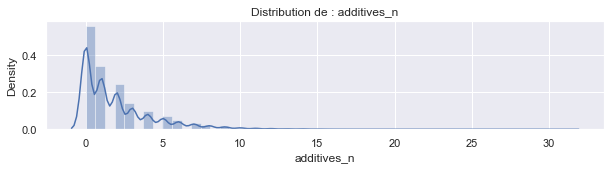

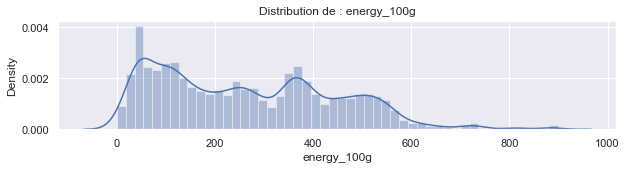

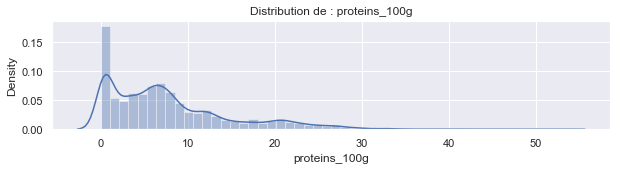

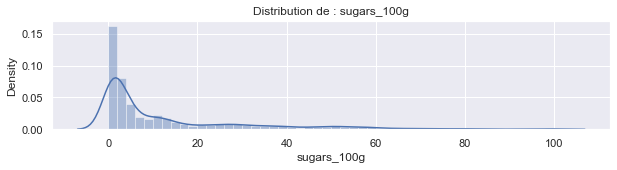

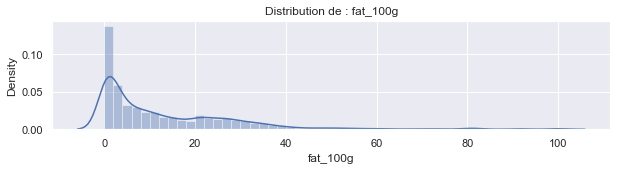

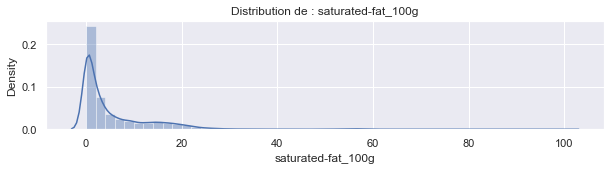

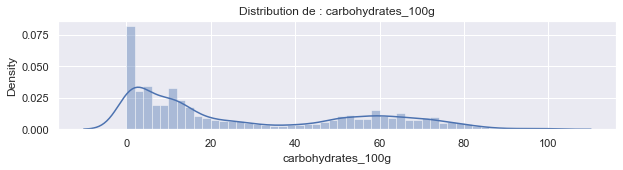

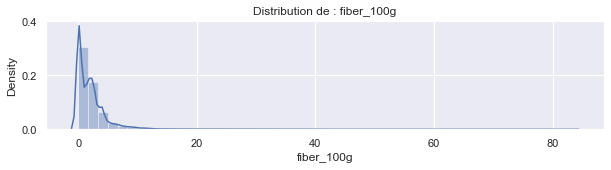

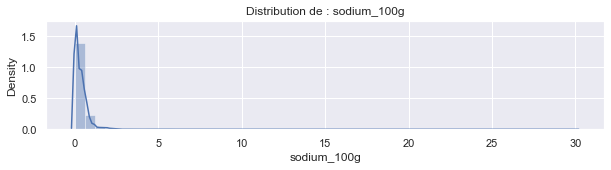

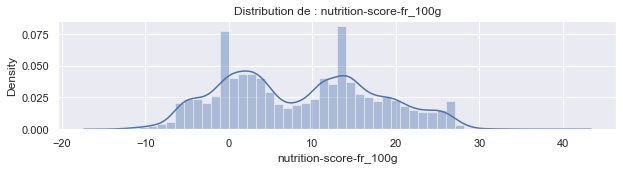

In [58]:
numeric_columns = df.select_dtypes(include = ['int32','float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(df[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

Observations :

- Certaines distributions ont une allure très semblable:

fat_100g,
saturated-fat_100g,
carbohydrates_100g (à l’exception de la partie entre 40 et 80g),
sugars_100g,
fiber_100g,
sodium_100g,
salt_100g,
proteins_100g,
- Certaines variables sont discrètes:

nutrition-score-fr_100g,
additives_n

## Boîtes à moustaches

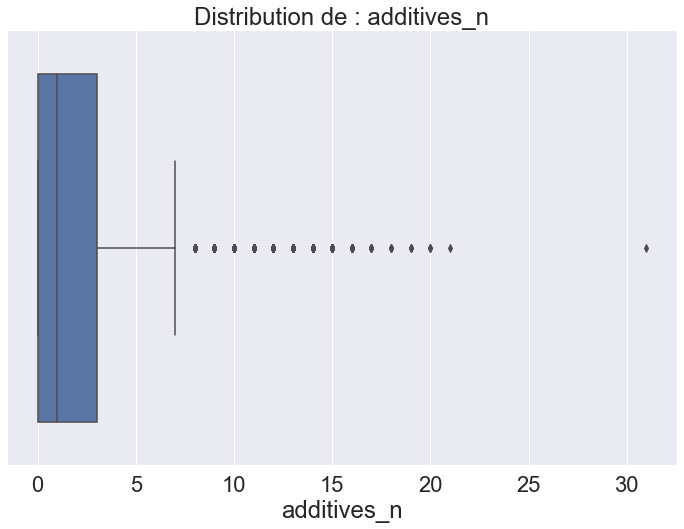

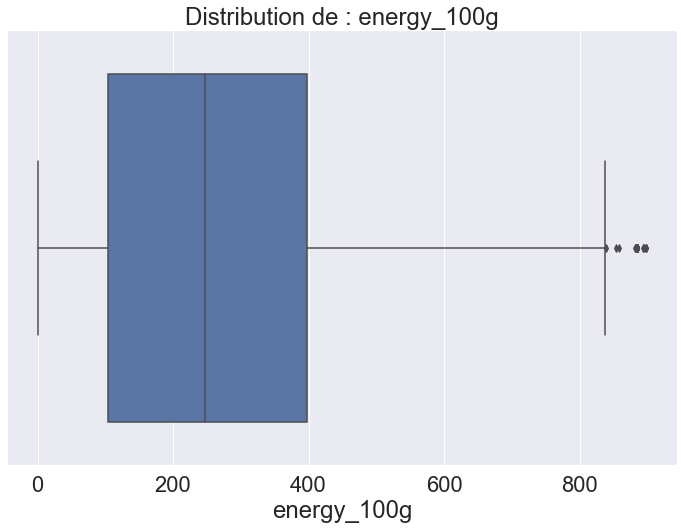

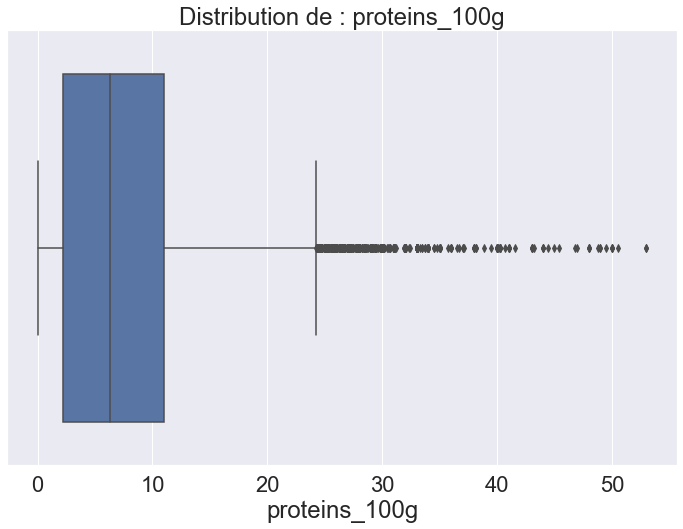

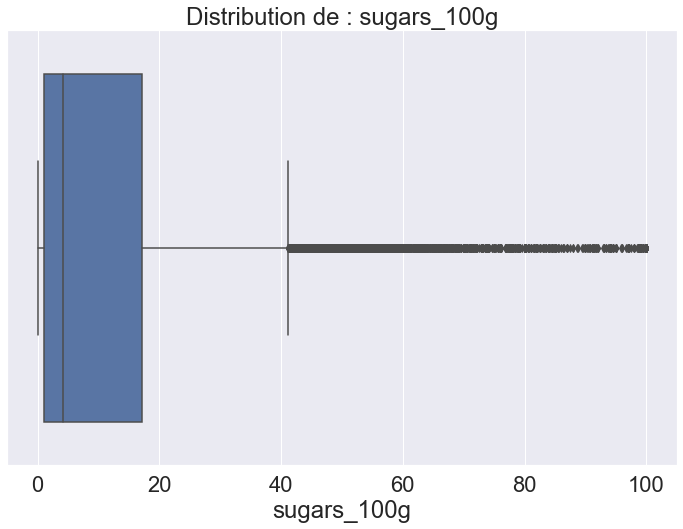

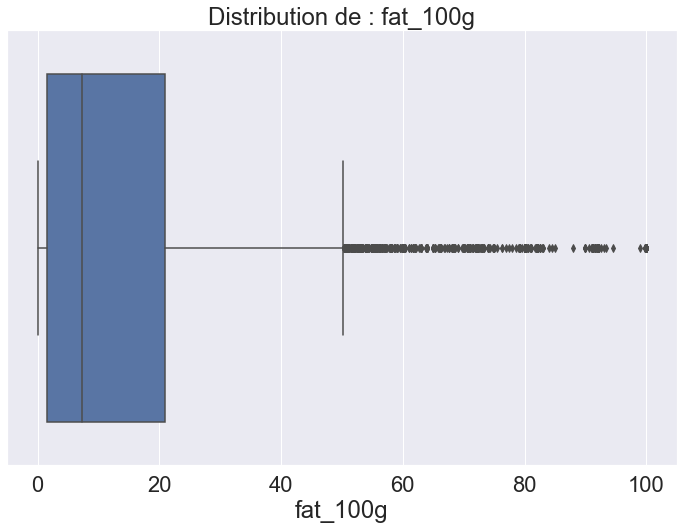

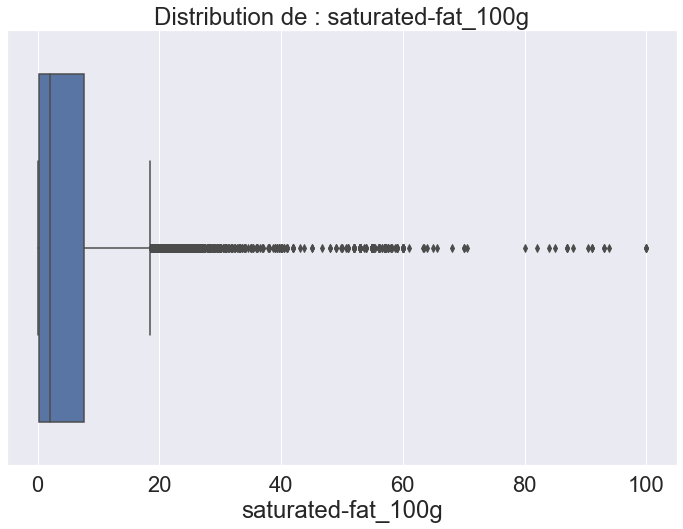

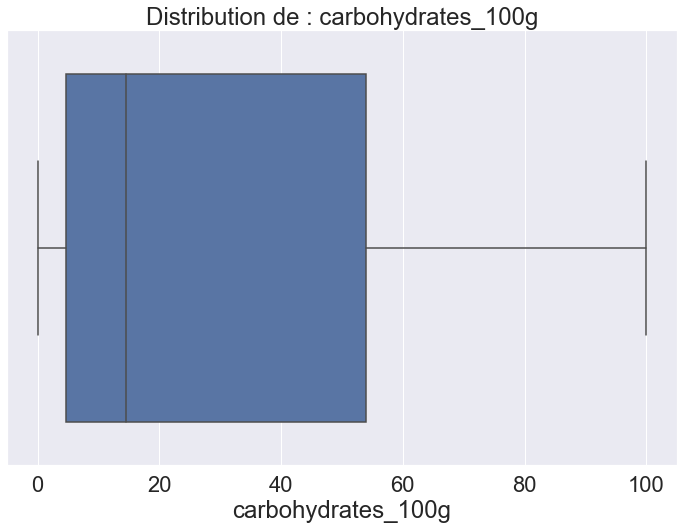

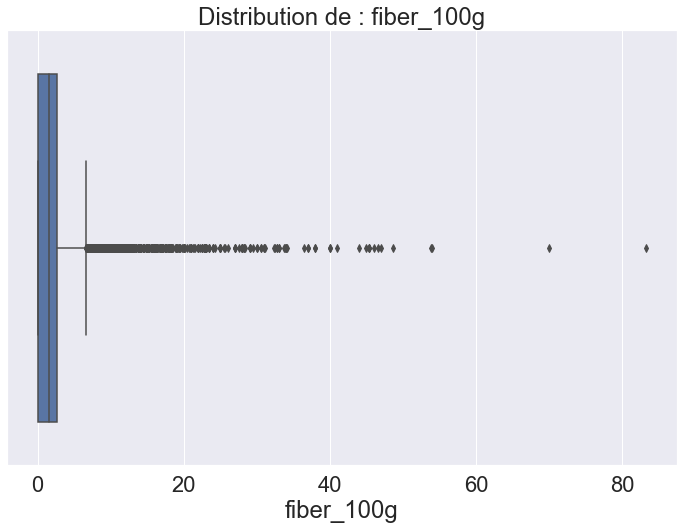

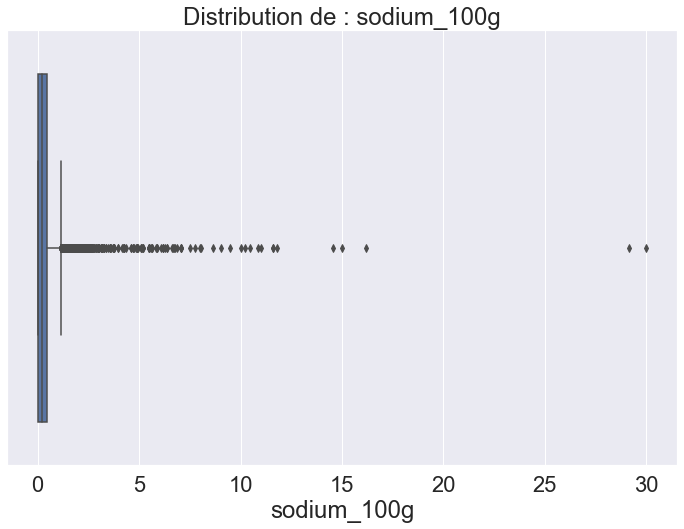

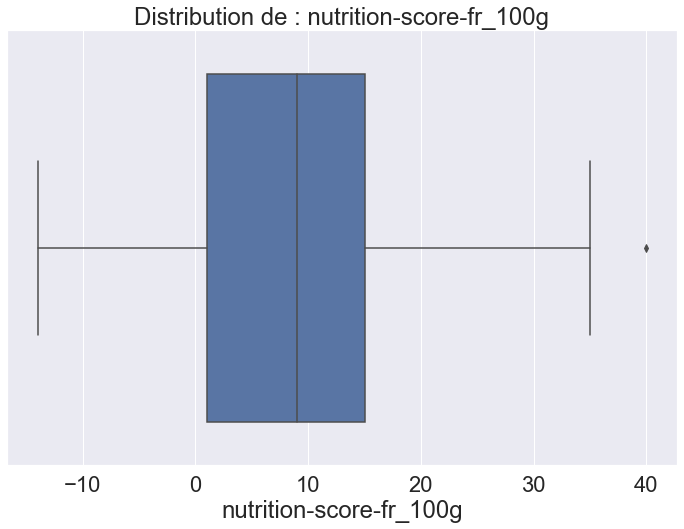

In [59]:
numeric_columns = df.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (12,8))
    
    sns.boxplot(df[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

En observant les boxplot, on constate que les différentes variables ne semblent pas suivre une loi normale.


## Nutriscore


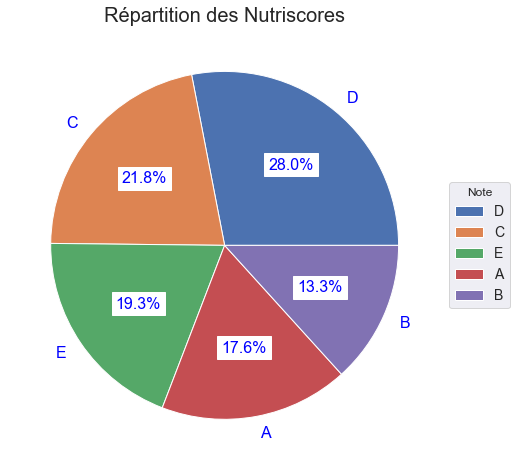

In [60]:
plt.figure(figsize=(8,8))

plt.title('Répartition des Nutriscores', size=20)
wedges, texts, autotexts = plt.pie(df.nutrition_grade_fr.value_counts().values, 
        labels = df.nutrition_grade_fr.value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 16, 
                                     'color' : 'Blue', 
                                     'backgroundcolor' : 'White',}
       )

ax = plt.gca()

ax.legend(wedges, df.nutrition_grade_fr.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

## Additifs

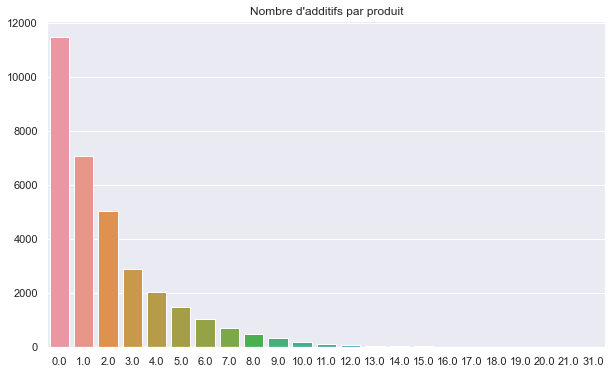

In [61]:
plt.figure(figsize=(10,6))
plt.title('Nombre d\'additifs par produit')
sns.barplot(x = df.additives_n.value_counts().index,
           y = df.additives_n.value_counts().values )
plt.show()

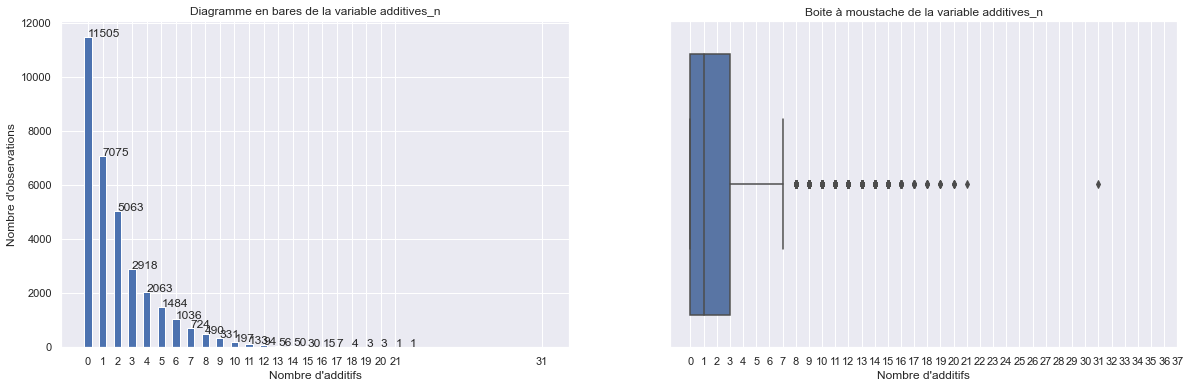

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count    33283.000000
mean         2.008503
std          2.491260
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         31.000000
Name: additives_n, dtype: float64

In [62]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

#Barplot parametters
axes[0].bar(df["additives_n"].value_counts().index, df["additives_n"].value_counts().values, width=0.5)
axes[0].set_xticks(df["additives_n"].value_counts().index)
for idx, value in enumerate(df["additives_n"].value_counts()):
    axes[0].text(idx, value, str(value))
axes[0].set_xlabel("Nombre d'additifs")
axes[0].set_ylabel("Nombre d'observations")
axes[0].set_title("Diagramme en bares de la variable additives_n")

#Boxplot parametter
increments = 1
start, end = axes[1].get_xlim()
axes[1] = sns.boxplot(data=df, x='additives_n')
axes[1].xaxis.set_ticks(np.arange(0, 38, increments))
axes[1].set_title("Boite à moustache de la variable additives_n")
axes[1].set_xlabel("Nombre d'additifs")

plt.show()

print('-' * 223)
print("Indicateurs de distribution")
df["additives_n"].describe()

- Les observations ont majoritairement entre 0 et 3 additifs. 3 étant la valeur du troisième quartile.
- La valeur médiane séparant les observation en deux est 1 additif.
- La moustache supérieure représentant la limite de 1.5 écarts inter-quartiles est à 8 additifs. Au delà les valeurs sont considérées comme atypiques.

# Analyse Bivariée

## Matrice de corrélation

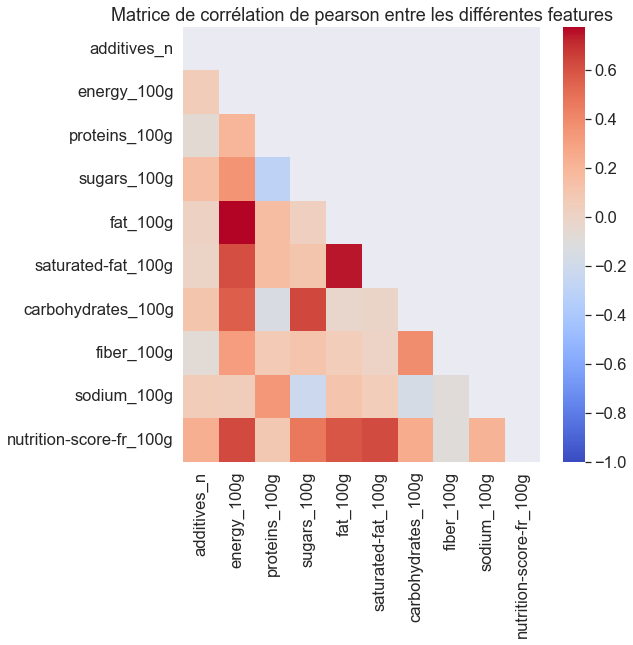

In [63]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = df[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

Analyse du tableau :

- additives_n : pas de correlation remarquable
- energy_100g : forte corrélation avec:
   - fat_100g
   - saturated-fat_100g
   - carbohydrates_100g
   - nutrition-score-fr_100g
   - fiber_100g
   - sugars_100g
- fat_100g et saturated-fat_100g fortement corrélés
- nutrition-score-fr_100g : forte corrélation avec:
   - saturated_fat_100g
   - energy_100g
   - fat_100g
   - sugars_100g
- sugars_100g : forte correlation avec carbohydrates_100g

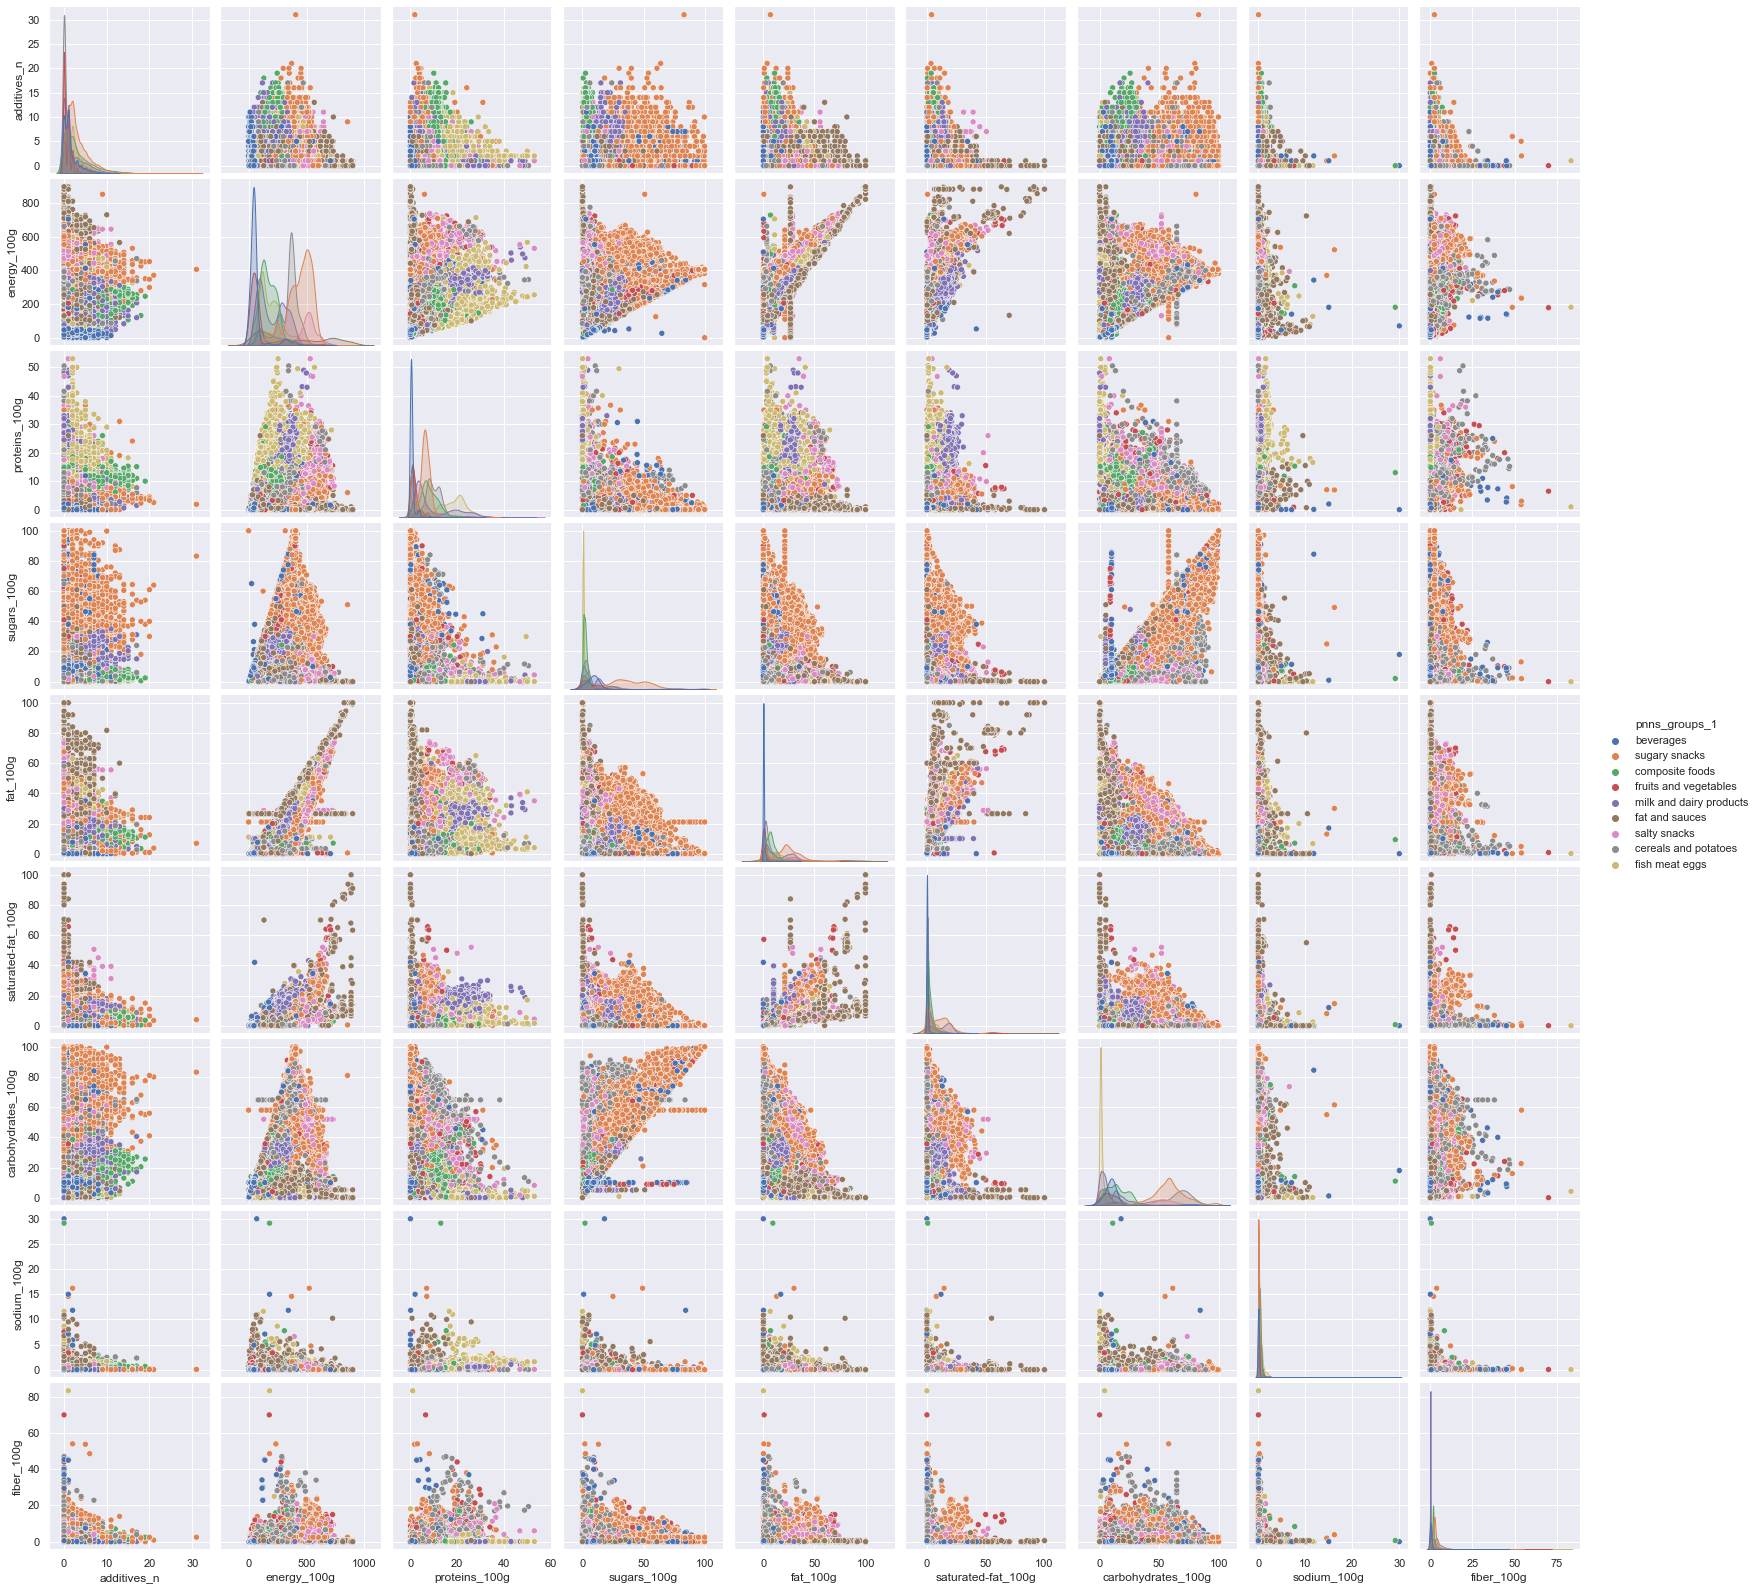

In [64]:
plot_cols =  ["additives_n", "energy_100g", "proteins_100g", "sugars_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sodium_100g","fiber_100g","pnns_groups_1"]
quant_data = df.loc[:,plot_cols]
sns.pairplot(data=quant_data, hue="pnns_groups_1")
plt.show()

In [65]:
numerical_features = list(df.select_dtypes(include=["float64","int64"]).columns)

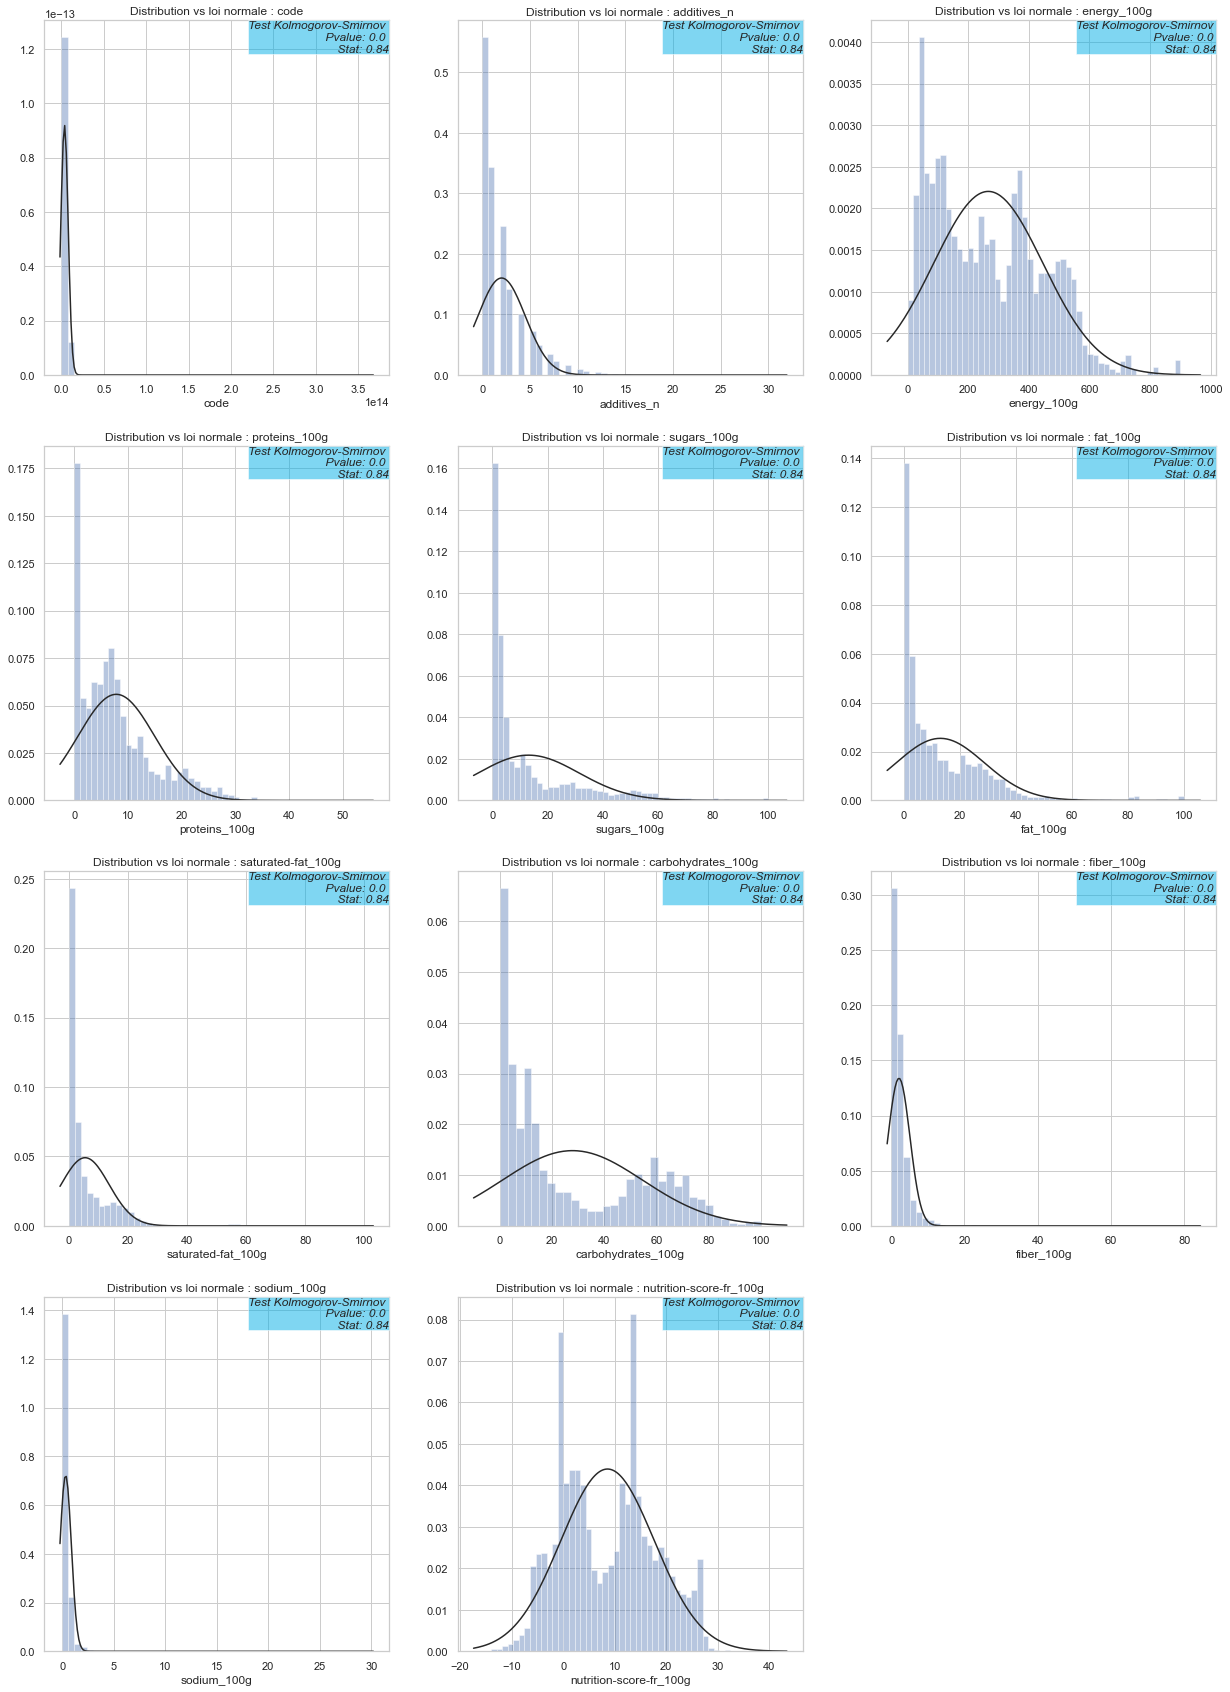

In [66]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    kstest = stats.kstest(df[colonne].notnull(),'norm')
    ax = sns.distplot(df[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

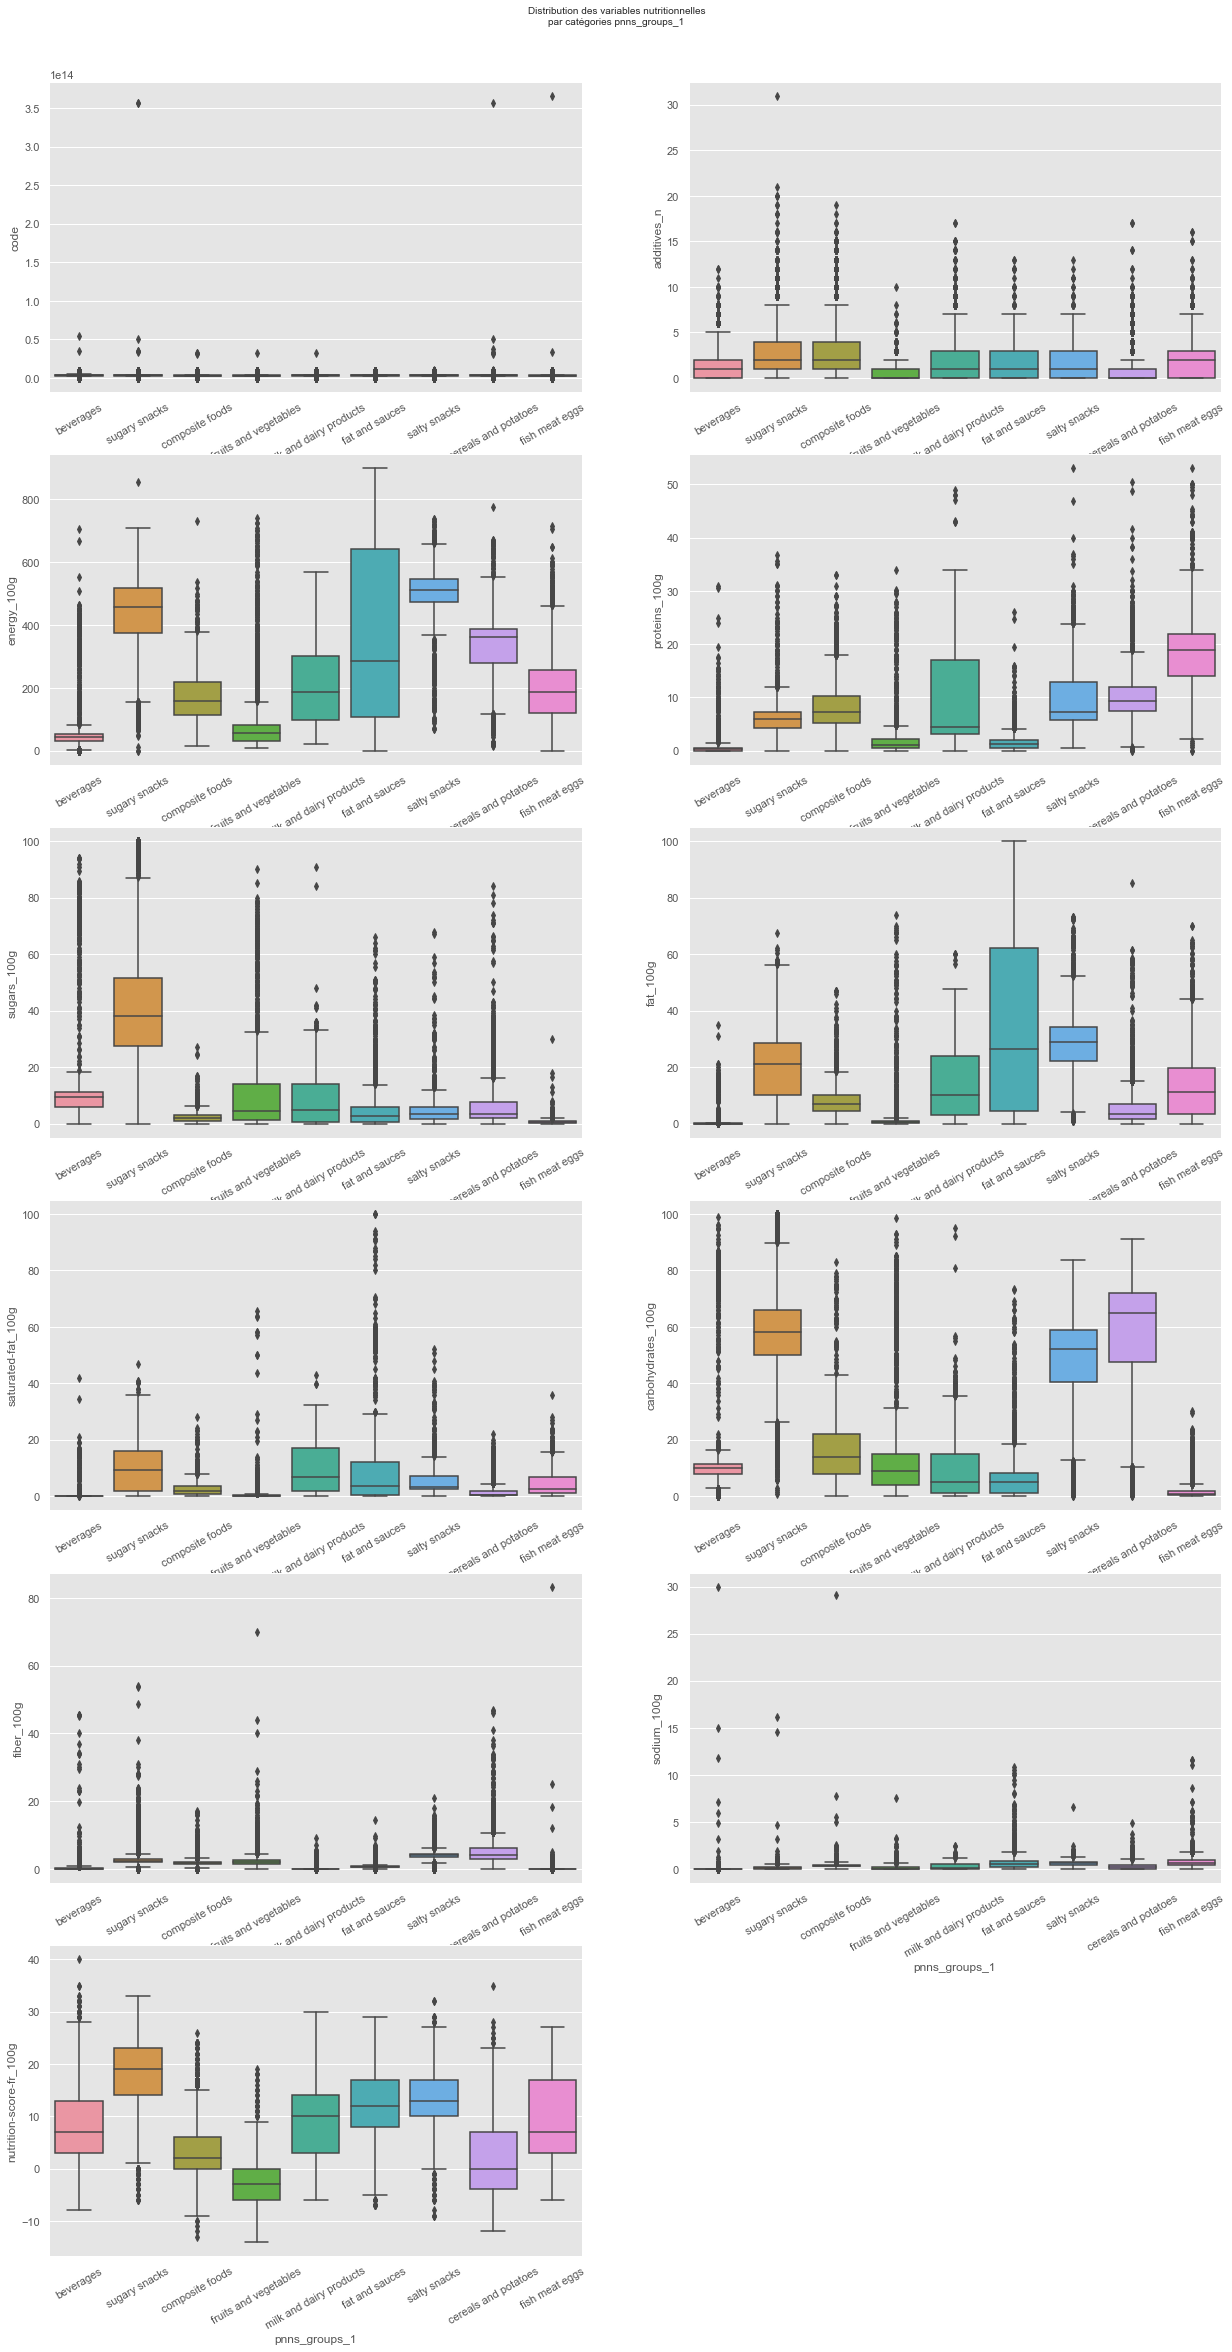

In [67]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(6,2,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=df[df["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_1", ha="center")
plt.show()

# Additoscore

In [68]:
nutriscore_features = ['pnns_groups_1', 'nutrition_grade_fr', 'nutrition-score-fr_100g','additives_n',
                       'energy_100g','sugars_100g','saturated-fat_100g','fat_100g', 'fiber_100g','sodium_100g', 'proteins_100g']
df[nutriscore_features].sample(10)

pnns_groups_1 nutrition_grade_fr  nutrition-score-fr_100g  \
20971  milk and dairy products                  c                      7.0   
16211    fruits and vegetables                  c                      4.0   
7478      cereals and potatoes                  a                     -4.0   
7821            fish meat eggs                  a                     -4.0   
3857     fruits and vegetables                  b                      0.0   
29732            sugary snacks                  e                     21.0   
24808            sugary snacks                  d                     18.0   
30675            sugary snacks                  e                     23.0   
5642            fish meat eggs                  d                     13.0   
16176    fruits and vegetables                  a                     -8.0   

       additives_n  energy_100g  sugars_100g  saturated-fat_100g  fat_100g  \
20971          3.0   153.202677         12.0                 5.2       8.1   
16211          1.0    41.108987          4.1                 0.9       1.4   
7478           1.0   406.070746          7.3                 0.6       5.1   
7821           0.0   104.923518          0.0                 0.4       1.0   
3857           0.0    35.850860          1.4                 0.4       1.2   
29732          1.0   379.063098         43.9                 8.4      13.7   
24808          2.0   342.017208         12.0                 8.5      12.1   
30675          1.0   564.053537         46.7                15.6      36.5   
5642           2.0   184.512428          0.9                 6.1      14.0   
16176          0.0    26.290631          1.9                 0.1       0.2   

       fiber_100g  sodium_100g  proteins_100g  
20971         0.1     0.055118            3.0  
16211         1.2     0.460000            0.6  
7478          3.9     0.000000           12.0  
7821          0.1     0.059055           24.0  
3857          1.5     0.275591            0.9  
29732         0.0     0.000000            4.8  
24808         2.5     0.433071            7.8  
30675         3.2     0.078740            9.3  
5642          0.1     0.511811           13.0  
16176         2.1     0.015748            1.9

In [69]:
df.pnns_groups_1.unique()

array(['beverages', 'sugary snacks', 'composite foods',
       'fruits and vegetables', 'milk and dairy products',
       'fat and sauces', 'salty snacks', 'cereals and potatoes',
       'fish meat eggs'], dtype=object)

In [70]:
high_rate_fruit = ['fruits and vegetables','cereals and potatoes']

medium_rate_fruit = ['beverages','fat and sauces']

low_rate_fruit = ['milk and dairy products','fish meat eggs','salty snacks','sugary snacks','composite foods']

In [71]:
df['fruits-vegetables-rate_100g'] = [81 if cat in high_rate_fruit else 45 if cat in medium_rate_fruit else 25 for cat in df.pnns_groups_1]

In [72]:
def additoscore(row):
    #Energy
    if row["energy_100g"] <= 335:
        a = 0
    elif ((row["energy_100g"] > 335) & (row["energy_100g"] <= 1675)):
        a = 35
    else:
        a = 60 
    #Sugar
    if row["sugars_100g"] <= 4.5:
        b = 0
    elif ((row["sugars_100g"] > 4.5) & (row["sugars_100g"] <= 22.5)):
        b = 35
    else:
        b = 60
    #saturated-fat
    if row["saturated-fat_100g"] <= 1:
        c = 0
    elif ((row["saturated-fat_100g"] > 1) & (row["saturated-fat_100g"] <= 5)):
        c = 35
    else:
        c = 60
  #sodium
    if (row["sodium_100g"]/1000) <= 90:
        d = 0
    elif (((row["sodium_100g"]/1000) > 90) & ((row["sodium_100g"]/1000) <= 450)):
        d = 35
    else:
        d = 60
    #fruits-vegetables-rate
    if row["fruits-vegetables-rate_100g"] <= 40:
        e = 0
    elif ((row["fruits-vegetables-rate_100g"] > 40) & (row["fruits-vegetables-rate_100g"] <= 80)):
        e = -20
    else:
        e = -35
    #fiber
    if row["fiber_100g"] <= 0.7:
        f = 0
    elif ((row["fiber_100g"] > 0.7) & (row["fiber_100g"] <= 3.5)):
        f = -20
    else:
        f = -35
    #proteins
    if row["proteins_100g"] <= 1.6:
        g = 0
    elif ((row["proteins_100g"] > 1.6) & (row["proteins_100g"] <= 8)):
        g = -20
    else:
        g = -35
    #nombre d'additifs
    if ((row["additives_n"] >= 0) & (row["additives_n"] <= 3)):
        h = 8
    elif ((row["additives_n"] > 4) & (row["additives_n"] <= 10)):
        h = 10
    elif ((row["additives_n"] > 10) & (row["additives_n"] <= 31)):
        h = 12
    else:
        h = 0
    
    #Global_score
    global_score = a+b+c+d+e+f+g+h
    
    return global_score

In [73]:
def addito_nutriscore(row):
    if row["additoscore"] < 0 :
        nutriscore = "a"
    elif ((row["additoscore"] >= 0) & (row["additoscore"] < 5)) :
        nutriscore = "b"
    elif ((row["additoscore"] >= 5) & (row["additoscore"] < 10)) :
        nutriscore = "c"
    elif ((row["additoscore"] >= 10) & (row["additoscore"] < 20)) :
        nutriscore = "d"
    else:
        nutriscore = "e"
        
    return nutriscore

In [74]:
df['additoscore'] = df.apply(lambda row: additoscore(row),axis=1)
df['addito_nutriscore'] = df.apply(lambda row: addito_nutriscore(row),axis=1)

In [75]:
nutriscore_features.append('additoscore')
nutriscore_features.append('addito_nutriscore')

In [76]:
df[nutriscore_features].sample(10)

pnns_groups_1 nutrition_grade_fr  nutrition-score-fr_100g  \
8207             sugary snacks                  d                     13.0   
24155                beverages                  d                      9.0   
20665     cereals and potatoes                  b                      0.0   
28519           fat and sauces                  d                     11.0   
8517   milk and dairy products                  c                     10.0   
18020            sugary snacks                  e                     23.0   
30397    fruits and vegetables                  a                     -5.0   
750              sugary snacks                  e                     20.0   
14602            sugary snacks                  e                     20.0   
25595     cereals and potatoes                  a                     -4.0   

       additives_n  energy_100g  sugars_100g  saturated-fat_100g  fat_100g  \
8207           5.0   381.931166         77.0                 1.5       3.3   
24155          2.0    26.051625          6.2                 0.0       0.0   
20665          0.0   355.640535          0.5                 0.2       0.7   
28519          1.0   141.013384         26.6                 0.0       0.0   
8517           0.0   186.663480          0.0                 8.0      11.0   
18020          2.0   483.747610         43.0                 5.9      25.0   
30397          1.0    60.468451         11.5                 0.1       0.2   
750            1.0   594.407266         37.9                17.8      43.4   
14602          1.0   532.982792         22.0                15.0      30.0   
25595          0.0   367.351816          3.0                 1.2       4.6   

       fiber_100g  sodium_100g  proteins_100g  additoscore addito_nutriscore  
8207          6.6     0.299213            4.7           85                 e  
24155         0.0     0.019685            0.1           23                 e  
20665         0.4     0.005000            6.8          -12                 a  
28519         0.6     0.511811            0.6           48                 e  
8517          0.1     0.551181           22.0           33                 e  
18020         2.5     0.295276            7.1          123                 e  
30397         1.6     0.010000            0.3          -12                 a  
750           3.6     0.070000            8.3           93                 e  
14602         2.8     0.299213            5.1           98                 e  
25595         3.0     0.039370           15.0          -12                 a

In [77]:
df[df['product_name']=='cakes raisins']

code   product_name  pnns_groups_1  additives_n  energy_100g  \
3    30  cakes raisins  sugary snacks          5.0   422.562141   

   proteins_100g  sugars_100g  fat_100g  saturated-fat_100g  \
3            5.8         28.0      19.0                 2.5   

   carbohydrates_100g  fiber_100g  sodium_100g  nutrition-score-fr_100g  \
3                56.0         1.8     0.255906                     13.0   

  nutrition_grade_fr  fruits-vegetables-rate_100g  additoscore  \
3                  d                           25          100   

  addito_nutriscore  
3                 e

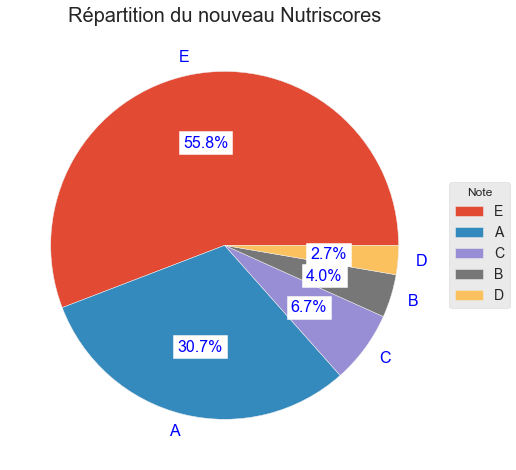

In [78]:
plt.figure(figsize=(8,8))

plt.title('Répartition du nouveau Nutriscores', size=20)
wedges, texts, autotexts = plt.pie(df.addito_nutriscore.value_counts().values, 
        labels = df.addito_nutriscore.value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 16, 
                                     'color' : 'Blue', 
                                     'backgroundcolor' : 'White',}
       )

ax = plt.gca()

ax.legend(wedges, df.addito_nutriscore.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

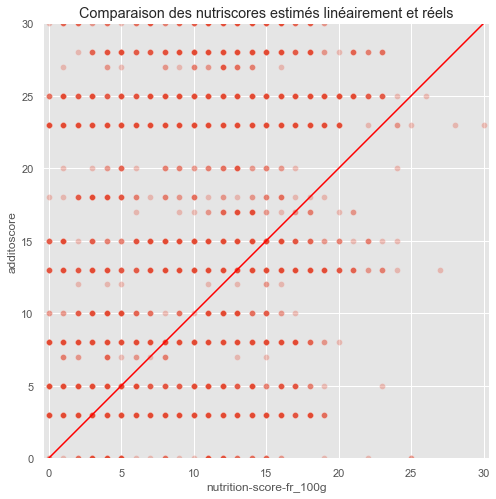

In [79]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Comparaison des nutriscores estimés linéairement et réels')
sns.scatterplot(x = df['nutrition-score-fr_100g'], y = df['additoscore'], alpha=0.3)
sns.lineplot([0 , 30], [0, 30], color='red')
ax = plt.gca()
ax.set_xlim(0,30)
ax.set_ylim(0,30)
plt.show()

# Analyse multivariées

In [80]:
df.describe()

code   additives_n   energy_100g  proteins_100g   sugars_100g  \
count  3.328300e+04  33283.000000  33283.000000   33283.000000  33283.000000   
mean   3.693747e+12      2.008503    266.152144       7.811705     13.131835   
std    4.338786e+12      2.491260    180.946108       7.135172     18.307349   
min    1.000000e+01      0.000000      0.000000       0.000000      0.000000   
25%    3.222475e+12      0.000000    104.206501       2.200000      1.100000   
50%    3.270190e+12      1.000000    246.414914       6.300000      4.200000   
75%    3.596690e+12      3.000000    397.466539      11.000000     17.100000   
max    3.661112e+14     31.000000    898.661568      53.000000    100.000000   

           fat_100g  saturated-fat_100g  carbohydrates_100g    fiber_100g  \
count  33283.000000        33283.000000        33283.000000  33283.000000   
mean      13.094953            5.454865           27.849345      2.115172   
std       15.707374            8.130426           26.936912      2.979421   
min        0.000000            0.000000            0.000000      0.000000   
25%        1.500000            0.300000            4.700000      0.100000   
50%        7.300000            2.000000           14.500000      1.600000   
75%       21.000000            7.600000           54.000000      2.700000   
max      100.000000          100.000000          100.000000     83.300000   

        sodium_100g  nutrition-score-fr_100g  fruits-vegetables-rate_100g  \
count  33283.000000             33283.000000                 33283.000000   
mean       0.340946                 8.595619                    39.626446   
std        0.552054                 9.077679                    22.163564   
min        0.000000               -14.000000                    25.000000   
25%        0.035433                 1.000000                    25.000000   
50%        0.236220                 9.000000                    25.000000   
75%        0.480315                15.000000                    45.000000   
max       30.000000                40.000000                    81.000000   

        additoscore  
count  33283.000000  
mean      26.716702  
std       53.629591  
min     -105.000000  
25%      -12.000000  
50%       23.000000  
75%       68.000000  
max      165.000000

## ACP

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

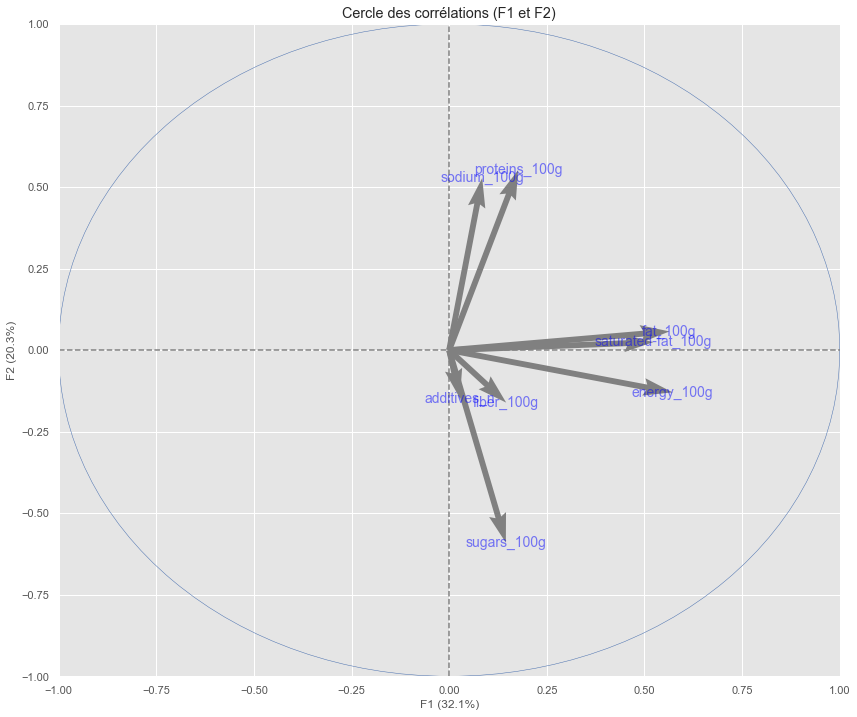

In [82]:
from sklearn import decomposition
from sklearn import preprocessing 

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(14,12))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
            
            
filtered_cols = ['additives_n','energy_100g','sugars_100g','saturated-fat_100g','fat_100g', 'fiber_100g','sodium_100g', 'proteins_100g']
X = df.loc[:, filtered_cols].values
features = df.loc[:, filtered_cols].columns
n_comp = 7

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

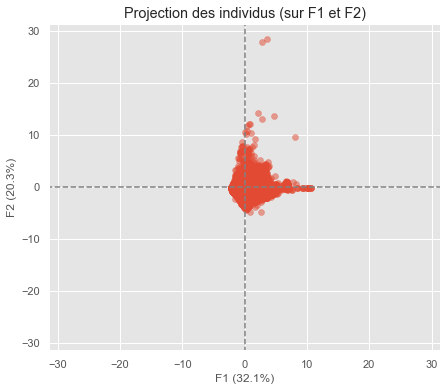

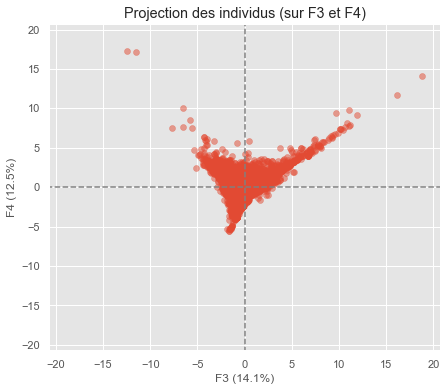

In [101]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], alpha = 0.5)

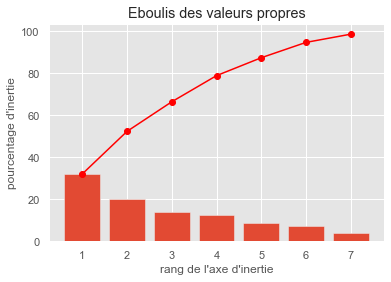

In [102]:
display_scree_plot(pca)

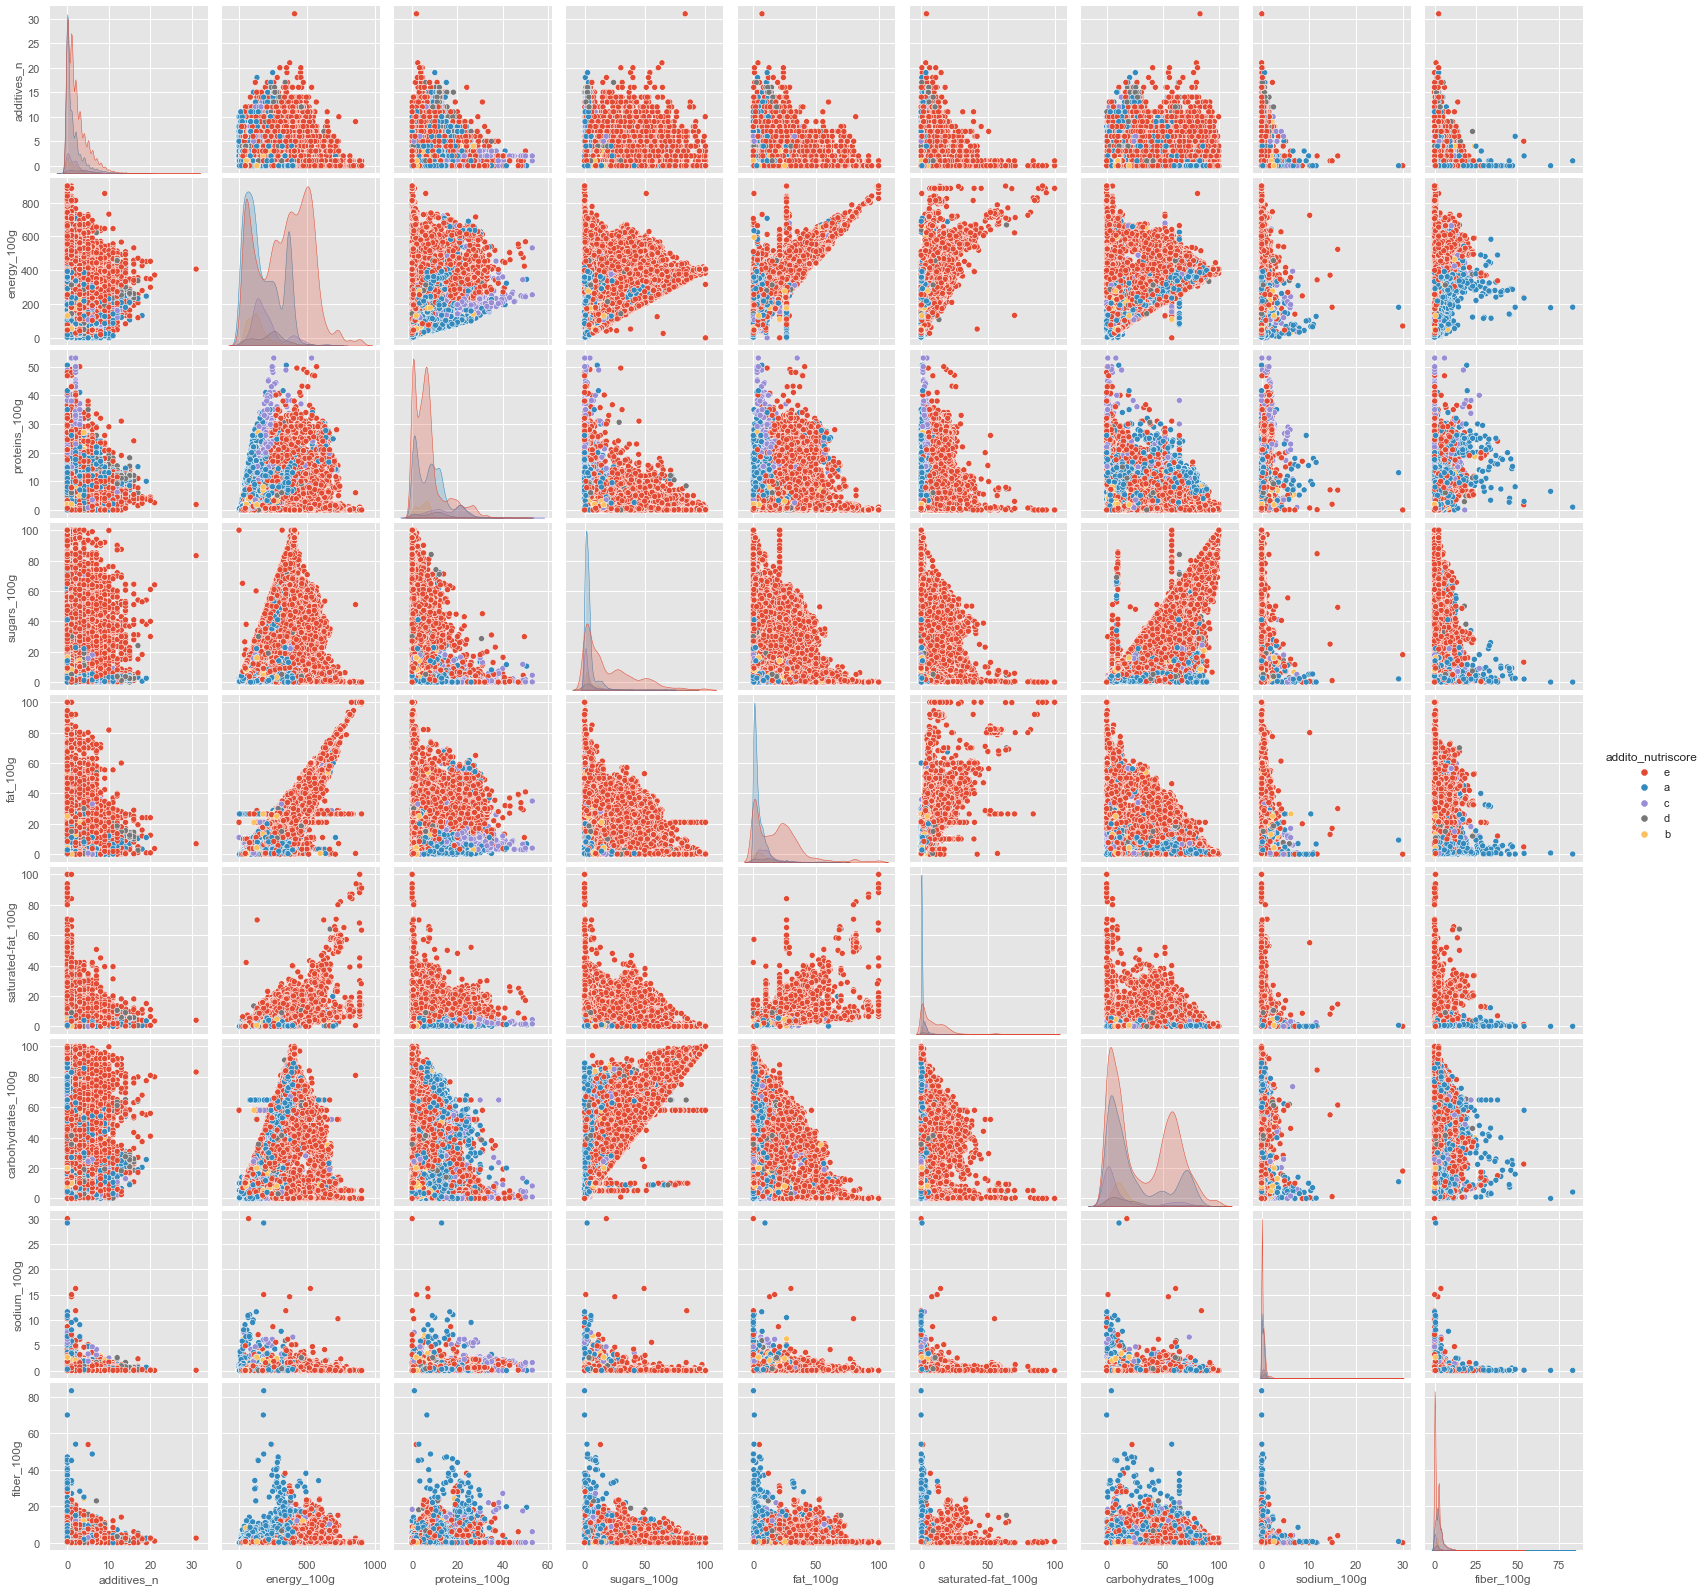

In [85]:
plot_cols =  ["additives_n", "energy_100g", "proteins_100g", "sugars_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sodium_100g","fiber_100g", "addito_nutriscore"]
quant_data = df.loc[:,plot_cols]
sns.pairplot(data=quant_data, hue="addito_nutriscore")
plt.show()

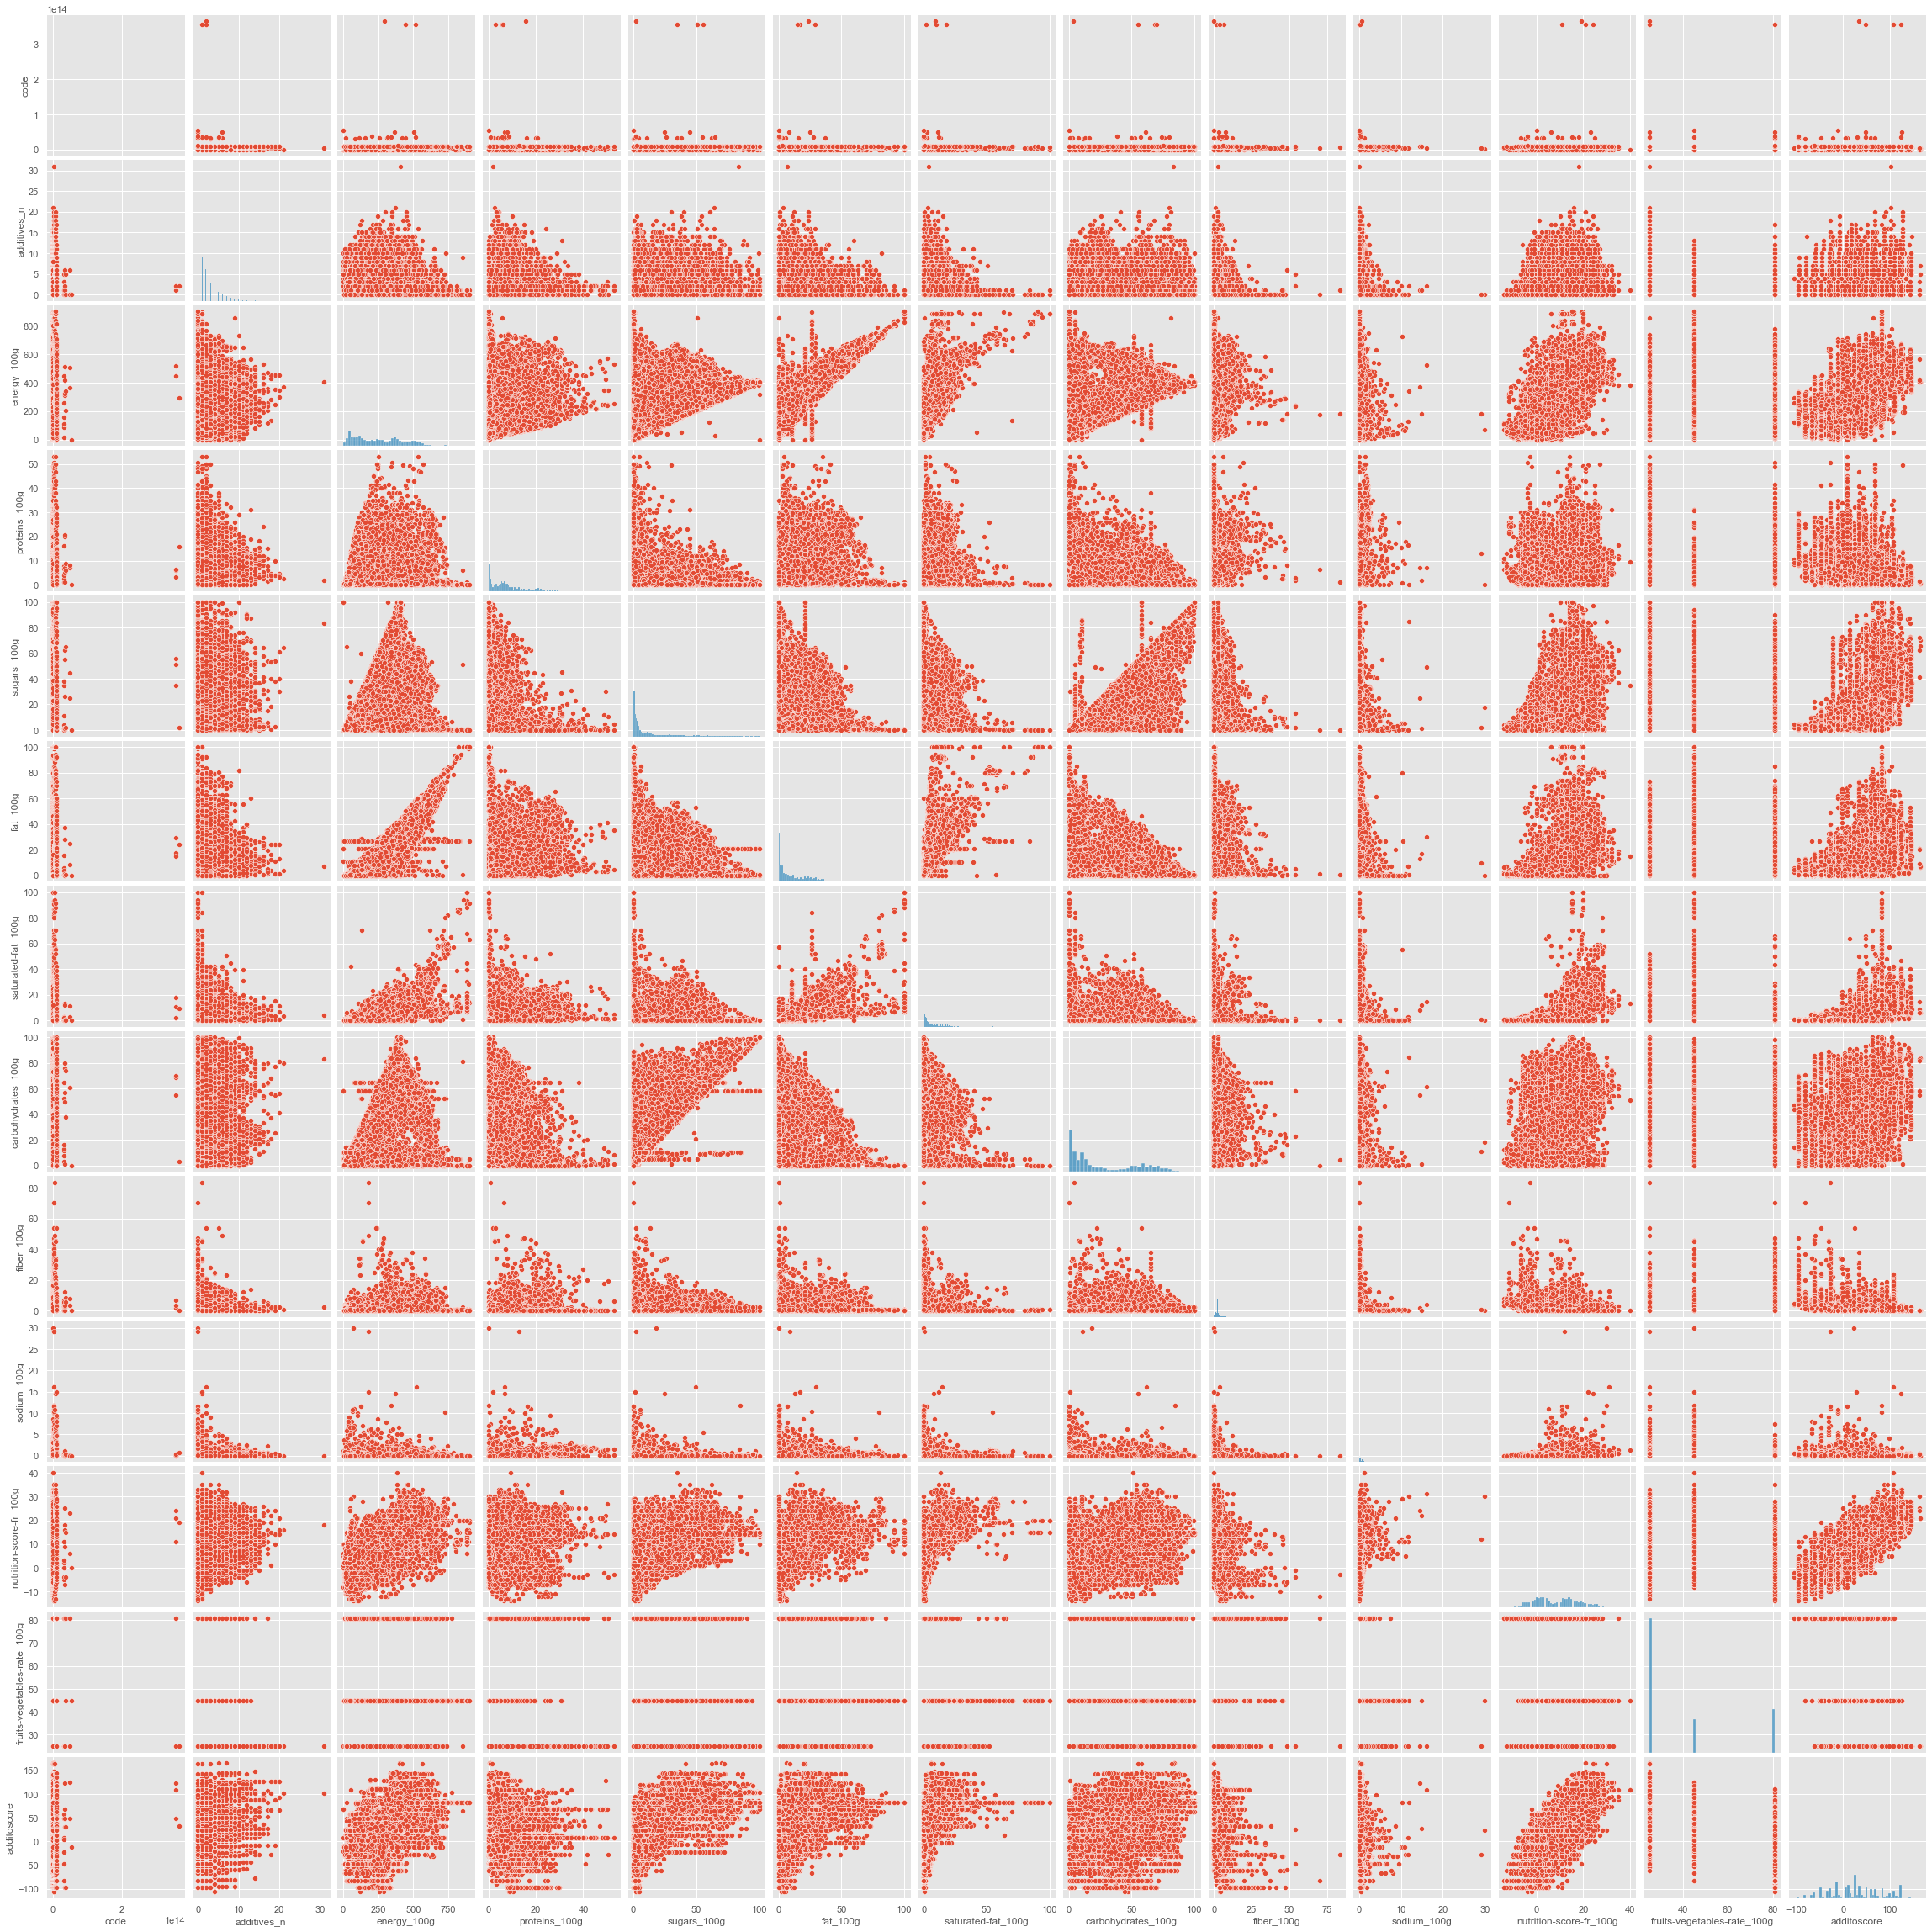

In [86]:
sns.pairplot(df)

# Normalisation du score

In [87]:
x_train = df['additoscore']
x_train  = x_train.values.reshape(-1, 1)

In [88]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df["score_minmax"]= min_max_scaler.fit_transform(x_train)
print(score_minmax)

[[0.47407407]
 [0.47407407]
 [0.75925926]
 ...
 [0.47407407]
 [0.47407407]
 [0.15925926]]


In [89]:
df

code                          product_name  \
0           40608754                 pepsi, nouveau goût !   
1           87177756                                   7up   
2                 10                     madeleines nature   
3                 30                         cakes raisins   
4                 31                      cakes aux fruits   
...              ...                                   ...   
33278  9556587103869                          mini paratha   
33279  9557129019006  healtier palm oil (l'huile de palme)   
33280  9577283844672               100% pur jus 4 agrumes    
33281  9778564312457   nature cheddar and red onion crisps   
33282  9847548283004   tartines craquantes bio au sarrasin   

              pnns_groups_1  additives_n  energy_100g  proteins_100g  \
0                 beverages          2.0    42.304015            0.0   
1                 beverages          3.0    42.304015            0.0   
2             sugary snacks          5.0   454.110899            6.0   
3             sugary snacks          5.0   422.562141            5.8   
4             sugary snacks         11.0   399.139579            4.9   
...                     ...          ...          ...            ...   
33278  cereals and potatoes          1.0   312.858509            6.0   
33279        fat and sauces          1.0   812.619503            0.0   
33280             beverages          0.0    45.889101            0.6   
33281          salty snacks          1.0   515.057361            7.8   
33282  cereals and potatoes          0.0   392.686424           13.0   

       sugars_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0             10.4       0.0                 0.0                10.4   
1             10.4       0.0                 0.0                10.4   
2             26.0      23.0                 2.5                55.0   
3             28.0      19.0                 2.5                56.0   
4             34.0      15.0                 2.0                60.0   
...            ...       ...                 ...                 ...   
33278          5.1      15.0                 9.0                41.4   
33279          0.0      92.0                39.0                 0.0   
33280          9.2       0.5                 0.0                10.2   
33281          1.8      28.7                 3.4                52.0   
33282          2.6       2.8                 0.6                74.8   

       fiber_100g  sodium_100g  nutrition-score-fr_100g nutrition_grade_fr  \
0             0.0     0.010000                     13.0                  e   
1             0.1     0.039370                     13.0                  e   
2             1.5     0.259843                     12.0                  d   
3             1.8     0.255906                     13.0                  d   
4             1.5     0.236220                     12.0                  d   
...           ...          ...                      ...                ...   
33278         6.5     0.354331                     10.0                  c   
33279         0.0     0.000000                     16.0                  d   
33280         0.6     0.011811                      4.0                  c   
33281         5.6     0.531496                      9.0                  c   
33282         5.9     0.267717                     -4.0                  a   

       fruits-vegetables-rate_100g  additoscore addito_nutriscore  \
0                               45           23                 e   
1                               45           23                 e   
2                               25          100                 e   
3                               25          100                 e   
4                               25          102                 e   
...                            ...          ...               ...   
33278                           81           13                 d   
33279                           45           83     

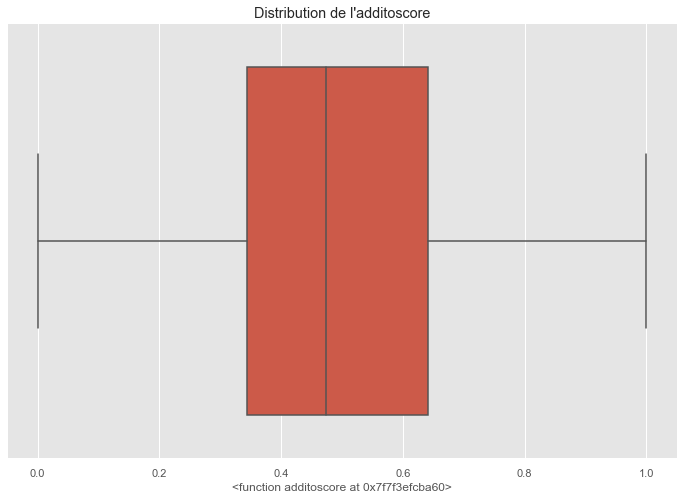

In [90]:
plt.figure(figsize = (12,8))
sns.boxplot(df["score_minmax"])
chaine = "Distribution de l'additoscore"
plt.title(chaine)
plt.xlabel(additoscore)
plt.show()

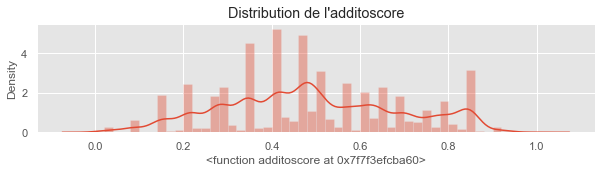

In [91]:
plt.figure(figsize = (10,2))
sns.distplot(df["score_minmax"], bins=50)
chaine = "Distribution de l'additoscore"
plt.title(chaine)
plt.xlabel(additoscore)
plt.show()

# Anova

In [92]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [93]:
X = df['addito_nutriscore'] 
Y = df['fat_100g']
    
eta_squared(X,Y)

0.19801317383419623

In [94]:
X = df['addito_nutriscore'] 
Y =df['energy_100g']
eta_squared(X,Y)

0.19065153122208983

In [95]:
X = df['addito_nutriscore'] 
Y =df['proteins_100g']
eta_squared(X,Y)

0.09250631052033571

In [96]:
X = df['addito_nutriscore'] 
Y =df['sodium_100g']
eta_squared(X,Y)

0.01921689945776687

In [97]:
X = df['addito_nutriscore'] 
Y =df['carbohydrates_100g']
eta_squared(X,Y)

0.05066158256435256

In [98]:
X = df['addito_nutriscore'] 
Y =df['saturated-fat_100g']
eta_squared(X,Y)

0.2022684275039247

In [99]:
X = df['addito_nutriscore']
Y =df['fiber_100g']
eta_squared(X,Y)

0.030214328813118377

In [100]:
X = df['addito_nutriscore']
Y =df['sugars_100g']
eta_squared(X,Y)

0.19639621524322065